In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *


In [53]:
# i am loading the dataset
df = pd.read_csv("insurance.csv")

In [54]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


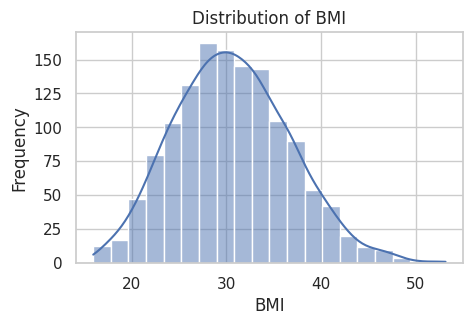

In [55]:
#we will Examine the distribution of Bmi

# Set the style of the plots
sns.set(style="whitegrid")

# Creating a histogram of the "bmi" distribution

#firstly creating graph figure with setting dimension(width,height)
plt.figure(figsize=(5, 3))
#bins is the num of boxes in histogram and kde for Kernel Density Estimate
sns.histplot(data=df, x="bmi", bins=20, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
#showing the graph
plt.show()
#As we can see from the below graph; BMI mostly intense in the values of (28,30) interval

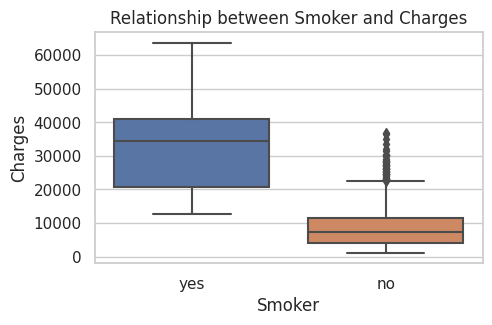

In [56]:
#we will examine relationship between “smoker” and “charges”
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()
#As we can see from the below graph; if someone is a smoker than probabilty of high charges is increasing


<Figure size 500x300 with 0 Axes>

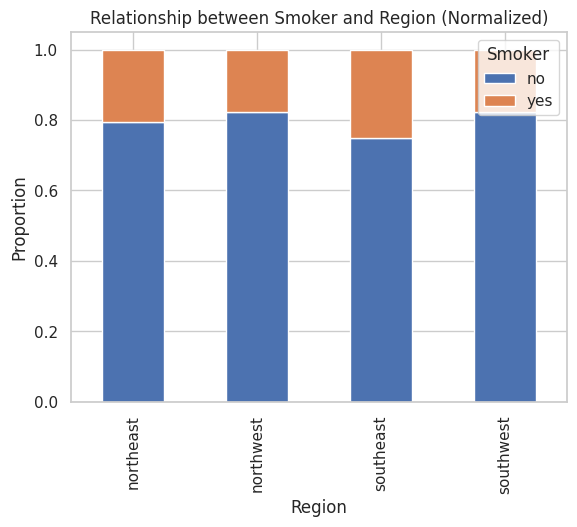

In [57]:
#we will examine the relationship between “smoker” and “region”.
plt.figure(figsize=(5, 3))
#group data as region
df_grouped = df.groupby(['region', 'smoker']).size().unstack()
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)
df_grouped.plot(kind='bar', stacked=True)
plt.title("Relationship between Smoker and Region (Normalized)")
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.legend(title="Smoker", loc="upper right")
plt.show()

#As we can see from the below graph; southeast has the most smoker population

<ipython-input-58-518a1607d318>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x="sex", y="bmi", palette="Set2")


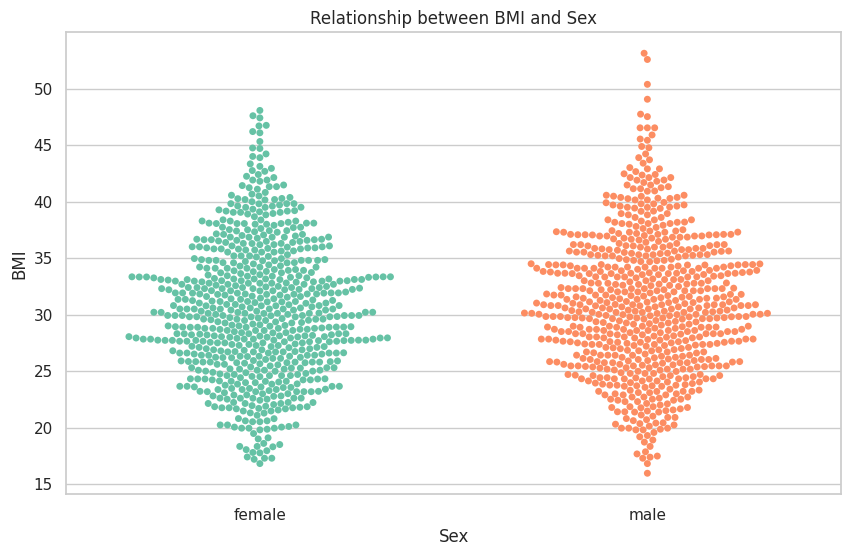

In [58]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x="sex", y="bmi", palette="Set2")
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()
#As we can see from the below graph; male's distribution range is wider. Also both genders spread to values between 30-35 mostly

In [59]:
# Group the data by "region" and calculate the sum of children for each region
children_by_region = df.groupby("region")["children"].sum()

# Find the region with the most children
most_children_region = children_by_region.idxmax()

print("Region with the most children:", most_children_region)


Region with the most children: southeast


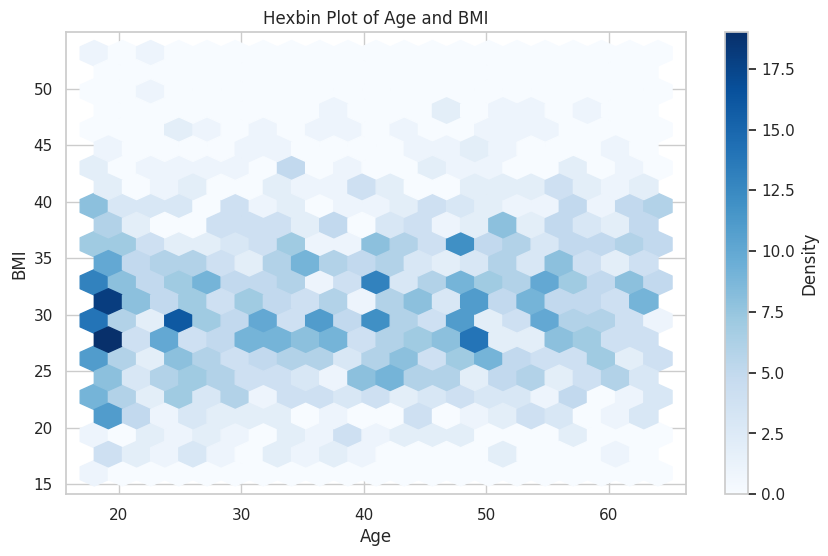

In [60]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['age'], df['bmi'], gridsize=20, cmap='Blues')
plt.colorbar(label='Density')
plt.title("Hexbin Plot of Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()
#As we can see from the below graph; people with age of twenties has the value between 28-33 BMI mostly

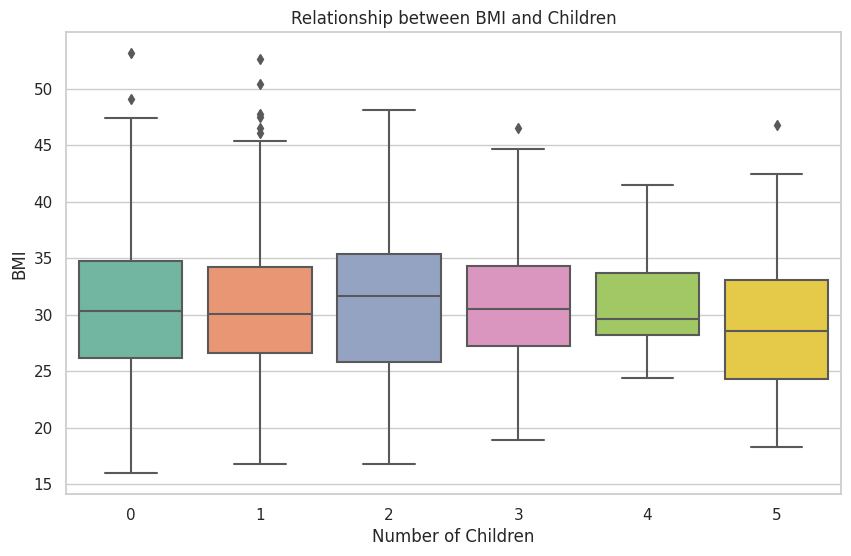

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="children", y="bmi", palette="Set2")
plt.title("Relationship between BMI and Children")
plt.xlabel("Number of Children")
plt.ylabel("BMI")
plt.show()
#As we can see from the below graph; relationship between BMI and Children distribution is close to each other

In [62]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]
print("Potential outliers:\n", potential_outliers)
#values between 47-53 (approximately) is accepted as potential outliers.

Potential outliers:
       age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


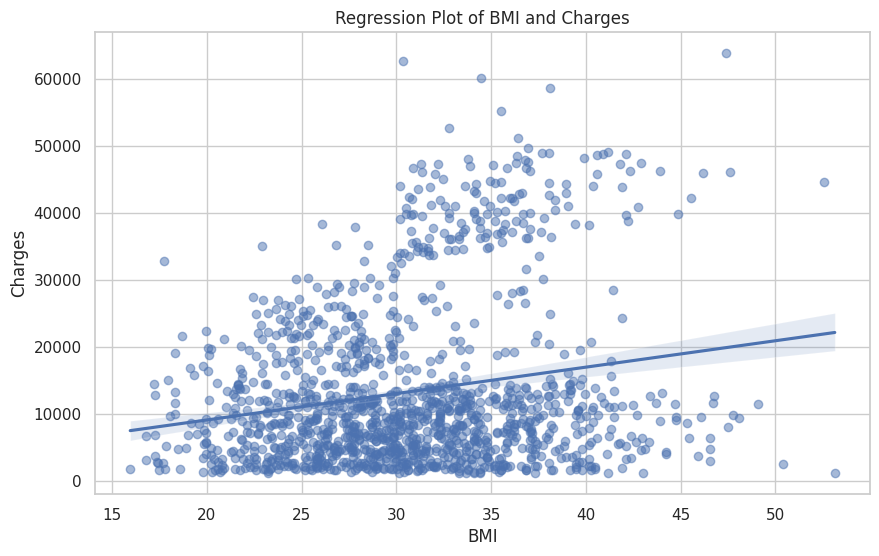

In [63]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="bmi", y="charges", scatter_kws={'alpha':0.5})
plt.title("Regression Plot of BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()
#as you can see the slope of regression line (positive); when BMI values increase, charges value also increase.

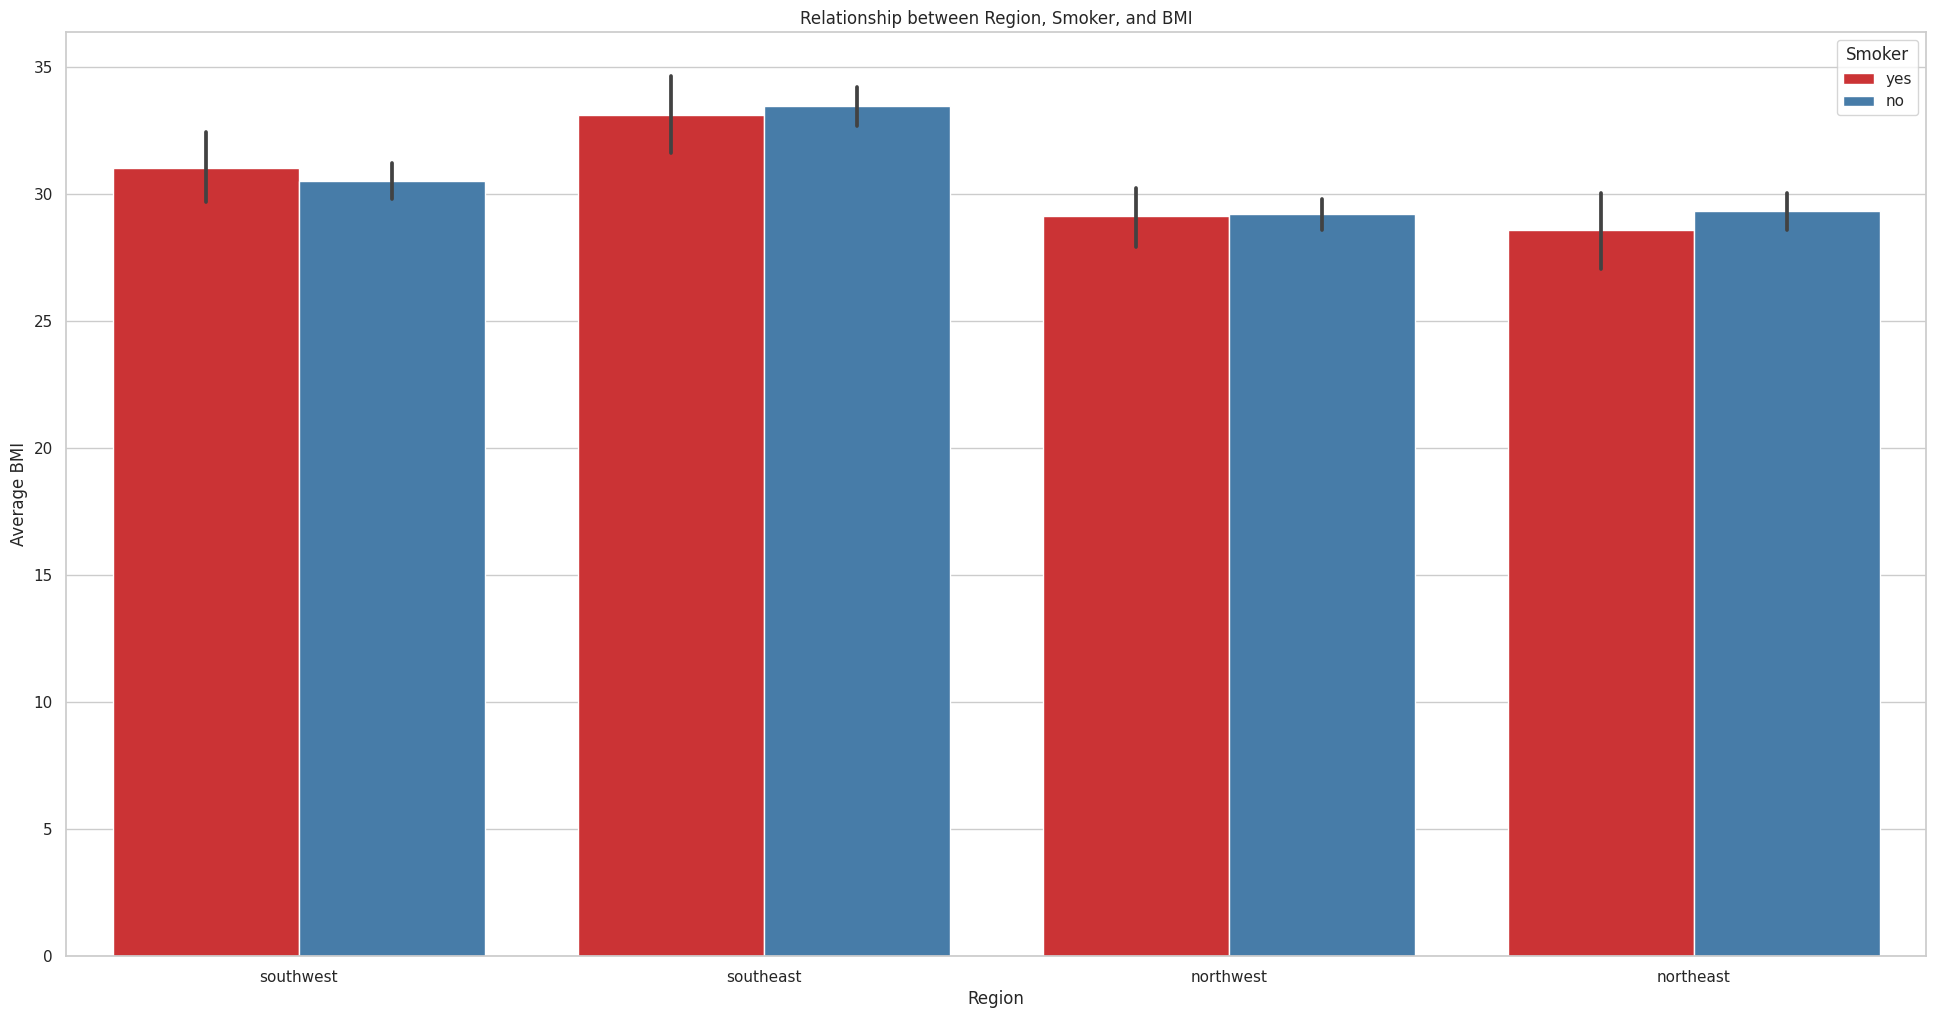

In [64]:
plt.figure(figsize=(24, 12))#i needed to get bigger size for this one to estimate smokers percent for each region
sns.barplot(data=df, x="region", y="bmi", hue="smoker", palette="Set1")
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("Average BMI")
plt.legend(title="Smoker")
plt.show()
#as you can see, southest has the most people with high BMI and norteast has the population that least smokers and least bmi also.

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

df['sex_encoded'] = labelencoder.fit_transform(df['sex'])

# Drop the original 'sex' column as it has been label-encoded
df.drop('sex', axis=1, inplace=True)

onehotencoder = OneHotEncoder()

one_hot_encoded_data = onehotencoder.fit_transform(df[['smoker', 'region']]).toarray()

feature_names = onehotencoder.get_feature_names_out(['smoker', 'region'])

# Convert the NumPy array back to a DataFrame
df_one_hot = pd.DataFrame(one_hot_encoded_data, columns=feature_names)

# Drop original 'smoker' and 'region' columns as they have been one-hot encoded
df.drop(['smoker', 'region'], axis=1, inplace=True)

# Concatenate toriginal df
df_final = pd.concat([df, df_one_hot], axis=1)

print("Final DataFrame with Label Encoded 'sex' and One-Hot Encoded 'smoker' and 'region':")
print(df_final)

Final DataFrame with Label Encoded 'sex' and One-Hot Encoded 'smoker' and 'region':
      age     bmi  children      charges  sex_encoded  smoker_no  smoker_yes  \
0      19  27.900         0  16884.92400            0        0.0         1.0   
1      18  33.770         1   1725.55230            1        1.0         0.0   
2      28  33.000         3   4449.46200            1        1.0         0.0   
3      33  22.705         0  21984.47061            1        1.0         0.0   
4      32  28.880         0   3866.85520            1        1.0         0.0   
...   ...     ...       ...          ...          ...        ...         ...   
1333   50  30.970         3  10600.54830            1        1.0         0.0   
1334   18  31.920         0   2205.98080            0        1.0         0.0   
1335   18  36.850         0   1629.83350            0        1.0         0.0   
1336   21  25.800         0   2007.94500            0        1.0         0.0   
1337   61  29.070         0  29141.3

In [66]:
from sklearn.model_selection import train_test_split

# Separate features (X) from the target variable (y)
X = df_final.drop('charges', axis=1)
y = df_final['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Fit scaler to training data and transform both the training and test data
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# Convert back to DataFrame for better visibility
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax_df = pd.DataFrame(X_test_minmax, columns=X_test.columns)

print("X_train with Min-Max Scaling:")
print(X_train_minmax_df)
print("\nX_test with Min-Max Scaling:")
print(X_test_minmax_df)


X_train with Min-Max Scaling:
           age       bmi  children  sex_encoded  smoker_no  smoker_yes  \
0     0.608696  0.107345       0.4          0.0        1.0         0.0   
1     0.630435  0.224913       0.0          0.0        1.0         0.0   
2     0.739130  0.239440       0.0          0.0        1.0         0.0   
3     0.456522  0.493947       1.0          0.0        1.0         0.0   
4     0.782609  0.148238       0.6          0.0        1.0         0.0   
...        ...       ...       ...          ...        ...         ...   
1065  0.000000  0.414044       0.8          0.0        1.0         0.0   
1066  0.456522  0.212806       1.0          0.0        1.0         0.0   
1067  0.869565  0.247915       0.0          1.0        1.0         0.0   
1068  0.413043  0.851224       0.4          0.0        0.0         1.0   
1069  0.804348  0.375034       0.0          1.0        1.0         0.0   

      region_northeast  region_northwest  region_southeast  region_southwest  
0 

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#highest value for best score (we will pick best one with the Mean MSE value of the models)
best_score = float('inf')  # Initialize with a high value
best_model=""
linear_regressor = LinearRegression()
# Perform cross-validation
cv_scores = cross_val_score(linear_regressor, X_train_minmax, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE scores to positive
mse_scores = -cv_scores
# Calculate mean and standard deviation of MSE scores
mean_mse_lin = mse_scores.mean()
std_mse = mse_scores.std()
print("Cross-Validation MSE Scores Linear Regression:", mse_scores)
print("Mean MSE Linear Regression:", mean_mse_lin)
print("Standard Deviation of MSE Linear Regression:", std_mse)
if mean_mse_lin < best_score:
        best_score = mean_mse_lin
        best_model="Linear Regression"


Cross-Validation MSE Scores Linear Regression: [40101885.44876769 32148453.25353016 35910188.22467399 46724978.80405717
 34758219.72017779]
Mean MSE Linear Regression: 37928745.09024136
Standard Deviation of MSE Linear Regression: 5091853.164128396


In [69]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=42)
# Perform cross-validation
cv_scores = cross_val_score(random_forest_regressor, X_train_minmax, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE scores to positive
mse_scores = -cv_scores
# Calculate mean and standard deviation of MSE scores
mean_mse_random = mse_scores.mean()
std_mse = mse_scores.std()
print("Cross-Validation MSE Scores Random Forest Regressor:", mse_scores)
print("Mean MSE Random Forest Regressor:", mean_mse_random)
print("Standard Deviation of MSE Random Forest Regressor:", std_mse)
if mean_mse_random < best_score:
        best_score = mean_mse_random
        best_model="Random Forest Regressor"

Cross-Validation MSE Scores Random Forest Regressor: [25546988.53992841 15607391.19669561 26044454.85312657 29122283.79157294
 24562017.64837746]
Mean MSE Random Forest Regressor: 24176627.205940194
Standard Deviation of MSE Random Forest Regressor: 4547670.193484841


In [70]:
from sklearn.svm import SVR
svr = SVR()
# Perform cross-validation
cv_scores = cross_val_score(svr, X_train_minmax, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE scores to positive
mse_scores = -cv_scores
# Calculate mean and standard deviation of MSE scores
mean_mse_SVR = mse_scores.mean()
std_mse = mse_scores.std()
print("Cross-Validation MSE Scores Support Vector Regressor:", mse_scores)
print("Mean MSE Support Vector Regressor:", mean_mse_SVR)
print("Standard Deviation of MSE Support Vector Regressor:", std_mse)
if mean_mse_SVR < best_score:
        best_score = mean_mse_SVR
        best_model="Support Vector Regressor"

Cross-Validation MSE Scores Support Vector Regressor: [1.56270322e+08 1.88447706e+08 1.38395587e+08 1.49603497e+08
 1.57476899e+08]
Mean MSE Support Vector Regressor: 158038802.0308598
Standard Deviation of MSE Support Vector Regressor: 16644247.912549693


In [71]:
#For this project we are using MSE(lowest value is the best) to choose best performing model, because
#The project's problem is actually regression problem(target value always changes)
#But in classification problems(mail is spam or not exc.) we use Accuracy score to choose best model.
print(f"Best performing model is {best_model} with the mean MSE value of {best_score}.")

Best performing model is Random Forest Regressor with the mean MSE value of 24176627.205940194.


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_minmax, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)  # negate to make MSE positive
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE Score: 22215776.68188001


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred = best_rf.predict(X_test_minmax)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

#as you can see from MSE value; after we used optimized model for Random forest, It has better predict score.
#Because in normal random forest MSE was 24176627.205940194. But when we optimized the model with grid search it is 18963138.983105205

Mean Absolute Error (MAE): 2438.633480259622
Mean Squared Error (MSE): 18963138.983105205
Root Mean Squared Error (RMSE): 4354.668642170745
